In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Upload the file with basic headers.
df = pd.read_csv("/Users/heskett/acp.phasing.analysis/pat1_imputed_phased.chr1.txt",sep="\t",header=None,index_col=None,
            names=["chrom","pos","rsid","ref","alt","qual","filter","info","format","son","dad","mom"],
            dtype = {"chrom":str,"pos":int,"rsid":str,"ref":str,"alt":str,"qual":str,"filter":str,
                                 "info":str,"format":str,"son":str,"dad":str,"mom":str})

In [3]:
## get df of all phased variants in son
df_son_phased = df[df["son"].str.contains("|",regex=False)]
df_son_phased["dist_to_next"] = df_son_phased["pos"].diff(periods=-1) *-1

/Users/heskett/packages/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
df_spdf_son_phased["dist_to_next"].describe(percentiles=[.8,0.99])

count    1.108200e+05
mean     2.246269e+03
std      5.507532e+04
min      1.000000e+00
50%      5.010000e+02
80%      1.915000e+03
99%      2.959229e+04
max      1.800029e+07
Name: dist_to_next, dtype: float64

(array([16398.,  8914.,  7038.,  5834.,  4993.,  4106.,  3835.,  3269.,
         2948.,  2683.,  2456.,  2151.,  2099.,  2010.,  1787.,  1715.,
         1590.,  1533.,  1337.,  1297.,  1192.,  1111.,  1048.,  1039.,
          915.,   893.,   855.,   801.,   797.,   763.,   634.,   665.,
          623.,   592.,   604.,   542.,   527.,   486.,   474.,   437.,
          413.,   411.,   409.,   385.,   380.,   351.,   359.,   315.,
          310.,   279.,   271.,   295.,   281.,   276.,   260.,   227.,
          259.,   234.,   225.,   230.,   226.,   213.,   203.,   196.,
          174.,   170.,   161.,   152.,   178.,   130.,   130.,   146.,
          148.,   141.,   129.,   117.,   129.,   125.,    93.,   121.,
          118.,   117.,   100.,   110.,   119.,    93.,    97.,    96.,
           95.,    77.,    98.,    97.,    84.,    85.,    82.,    92.,
           96.,    65.,    73.,    77.]),
 array([1.00000e+00, 6.09800e+01, 1.20960e+02, 1.80940e+02, 2.40920e+02,
        3.00900e+02, 

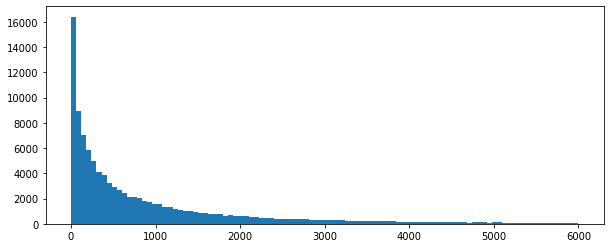

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
plt.hist(df_son_phased[df_son_phased["dist_to_next"]<=6000]["dist_to_next"],bins=100)
